# Machine Learning Basic

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

## Linear Regression

In [2]:
train = pd.read_csv('infant_mortality_train.csv')

print(train.shape)
train.head(10)

(159, 3)


,国名,GDP,乳児死亡率
0,Afghanistan,2848.0,154.0
1,Albania,863.0,32.0
2,Algeria,1531.0,44.0
3,Andorra,NaN,NaN
4,Angola,355.0,124.0
5,Antigua,6966.0,24.0
6,Armenia,354.0,25.0
7,Australia,20046.0,6.0
8,Austria,29006.0,6.0
9,Azerbaijan,321.0,33.0


#### 1. レコードされている国の数

In [3]:
print('レコードされている国の数:', train.shape[0])

レコードされている国の数: 159


#### 2. GDPか乳児死亡率のいずれかに欠損のある国の数

In [4]:
print(train.isnull().sum())

国名       0
GDP      7
乳児死亡率    6
dtype: int64


In [5]:
# 欠損値を1つでも含むものは削除する
train_dropna = train.dropna()

print(train_dropna.shape)

(148, 3)


In [6]:
print('いずれかに欠損のある国の数:', train.shape[0] - train_dropna.shape[0])

いずれかに欠損のある国の数: 11


#### 3. GDPと乳児死亡率との間の散布図・相関係数

[]

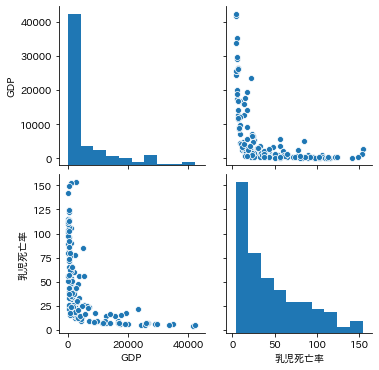

In [7]:
sns.pairplot(train_dropna[['GDP', '乳児死亡率']])
plt.plot()

In [8]:
train_dropna[['GDP', '乳児死亡率']].corr()

,GDP,乳児死亡率
GDP,1.000000,-0.533434
乳児死亡率,-0.533434,1.000000


#### 4. GDPと乳児死亡率、ともに対数をとった場合の散布図と相関係数

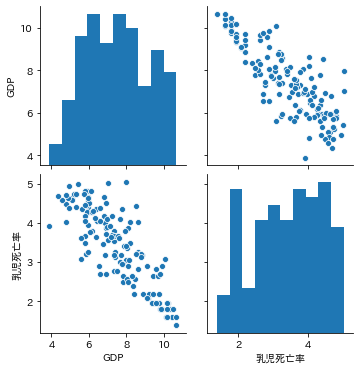

In [9]:
sns.pairplot(train_dropna[['GDP', '乳児死亡率']].apply(np.log))
plt.show()

In [10]:
train_dropna[['GDP', '乳児死亡率']].apply(np.log).corr()

,GDP,乳児死亡率
GDP,1.000000,-0.837786
乳児死亡率,-0.837786,1.000000


#### 5. 下記の式をもとに、線形回帰モデルを作成したときの回帰係数

\begin{align*}
\log(乳児死亡率) &= \beta_{0}+\beta_{1}\log(GDP)+誤差
\end{align*}

In [11]:
X_train = np.log(train_dropna[['GDP']])
y_train = np.log(train_dropna['乳児死亡率'])

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('切片:', linreg.intercept_)
print('回帰係数:', linreg.coef_)

切片: 7.137172994555433
回帰係数: [-0.49909537]


#### 6. 作成したモデルについて、下記の式で評価

\begin{align*}
R^2 &= 1-\sum_{i=1}^{n}\frac{(y_{i}-\hat{y}_{i})^2}{(y_{i}-\bar{y})^2}
\end{align*}

In [12]:
pred_train = linreg.predict(X_train)

print('train r2_score: {:.3f}'.format(r2_score(train_dropna['乳児死亡率'], np.exp(pred_train))))

train r2_score: 0.434


#### 7. テストデータを用いて予測

In [13]:
test = pd.read_csv('infant_mortality_test.csv')

print(test.shape)
test.head()

(45, 3)


,国名,GDP,乳児死亡率
0,Argentina,8055,22
1,Benin,391,84
2,Bosnia,271,13
3,Brazil,4510,42
4,Canada,18943,6


In [14]:
pred_test = linreg.predict(test[['GDP']].apply(np.log))

print('test r2_score: {:.2f}'.format(r2_score(test['乳児死亡率'], np.exp(pred_test))))

test r2_score: 0.26


## Clustering

In [15]:
train = pd.read_csv('flowcytometry.csv')

print(train.shape)
train.head()

(17532, 4)


,FL1.H,FL2.H,FL3.H,FL4.H
0,535.857117,17.818647,596.661865,191.029587
1,0.000000,98.526642,33.853153,58.457142
2,611.634949,124.730530,342.763184,201.468368
3,286.873016,31.444672,120.601860,191.029587
4,124.492065,0.000000,0.000000,177.459183


#### 1. レコードの数

In [16]:
print(train.shape[0])

17532


#### 2. 散布図（4変数間）

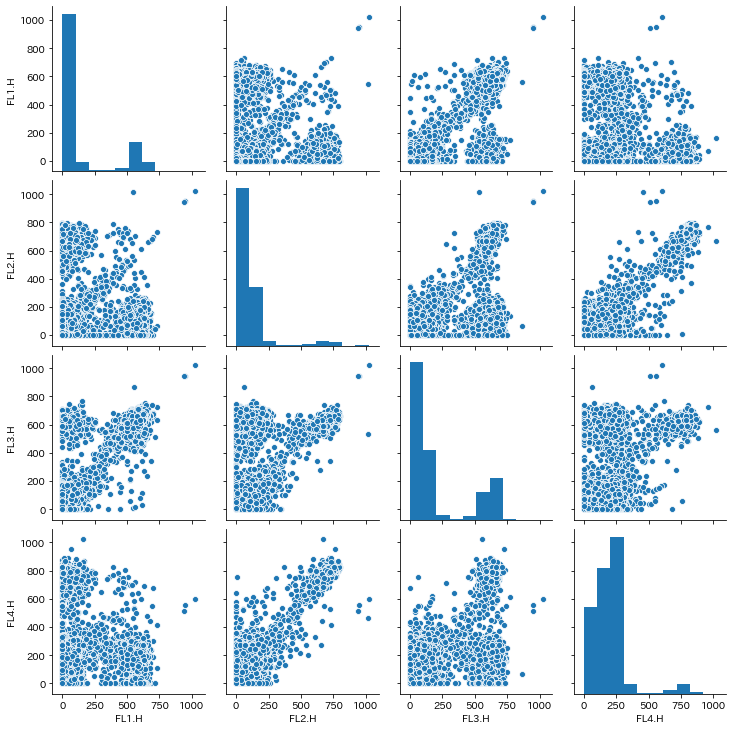

In [17]:
sns.pairplot(train)
plt.show()

#### 3. 各変数を標準化し、主成分分析を用いて2次元に次元圧縮した結果を散布図で図示

In [18]:
std = StandardScaler()

X_train = train
X_train_scaled = std.fit_transform(X_train)

In [19]:
# 主成分分析
pca = PCA(n_components=2)

y_train = pca.fit_transform(X_train_scaled)

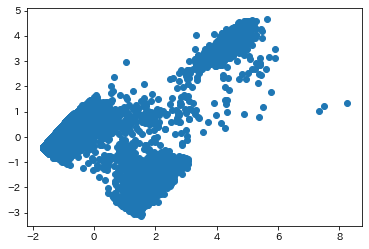

In [20]:
plt.scatter(y_train[:, 0], y_train[:, 1])
plt.show()

#### 4. K-Means法を実行し、3つのクラスターにデータを分割

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(y_train)

# testデータがないので、trainデータから予測する（pred_trainのようなもの）
cluster = kmeans.predict(y_train)

print('クラス:', cluster)

クラス: [1 0 1 ... 1 0 0]


#### 5. クラスごとに色分け

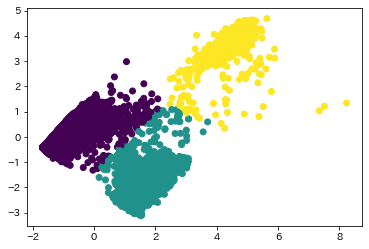

In [22]:
plt.scatter(y_train[:, 0], y_train[:, 1], c=cluster)
plt.show()

## Random Forest Regressor

#### 1. 線形回帰と同様に、testデータのr2_scoreを算出

In [26]:
X_train = train_dropna[['GDP']]
y_train = train_dropna['乳児死亡率']

In [30]:
rfr = RandomForestRegressor(n_estimators=100, max_leaf_nodes=25, min_samples_leaf=1)

rfr.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=25)

In [31]:
X_test = test[['GDP']]
y_test = test['乳児死亡率']

In [33]:
pred_test = rfr.predict(X_test)

print('test r2_score: {:.3f}'.format(r2_score(y_test, pred_test)))

test r2_score: 0.650
